In [1]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np

In [61]:
img = cv2.imread('hand 8.png') # uint8 -> uint16

In [62]:
z = 'hand 8.txt'  # Z and RGB
z = np.loadtxt(z)

In [63]:
mp_hands = mp.solutions.hands

In [64]:
mp_drawing = mp.solutions.drawing_utils

In [90]:
hands = mp_hands.Hands(max_num_hands=2,
                      min_detection_confidence=0.1,
                      min_tracking_confidence=0.1)

In [91]:
image = cv2.flip(img,1)
image_height, image_width, _ = img.shape

In [92]:
results = hands.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [93]:
print('Handedness: ', results.multi_handedness)

Handedness:  [classification {
  index: 1
  score: 0.7684947848320007
  label: "Right"
}
, classification {
  index: 0
  score: 1.0
  label: "Left"
}
]


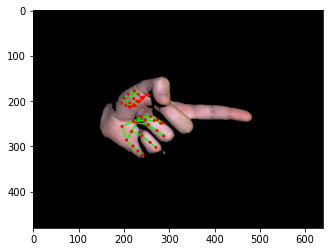

In [94]:
annoted_image = image.copy()
for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(annoted_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
imageshow = plt.imshow(cv2.cvtColor(annoted_image,cv2.COLOR_BGR2RGB))
cv2.imshow("Image",cv2.flip(annoted_image,1))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# x coordinates
p0x = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
p1x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
p2x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
p3x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
p4x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
p5x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
p6x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
p7x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
p8x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
p9x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
p10x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
p11x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
p12x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
p13x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
p14x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
p15x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
p16x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
p17x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
p18x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
p19x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
p20x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width

In [26]:
print(p6x)

259.2848777770996


In [27]:
# y coordinates
p0y = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
p1y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
p2y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
p3y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
p4y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
p5y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
p6y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
p7y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
p8y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
p9y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
p10y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
p11y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
p12y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
p13y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
p14y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
p15y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
p16y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
p17y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
p18y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
p19y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
p20y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height


In [28]:
print(p6y)

234.2227077484131


In [29]:
# z coordinates
p0z = z[int(p0y)][int(p0x)]
p1z = z[int(p1y)][int(p1x)]
p2z = z[int(p2y)][int(p2x)]
p3z = z[int(p3y)][int(p3x)]
p4z = z[int(p4y)][int(p4x)]
p5z = z[int(p5y)][int(p5x)]
p6z = z[int(p6y)][int(p6x)]
p7z = z[int(p7y)][int(p7x)]
p8z = z[int(p8y)][int(p8x)]
p9z = z[int(p9y)][int(p9x)]
p10z = z[int(p10y)][int(p10x)]
p11z = z[int(p11y)][int(p11x)]
p12z = z[int(p12y)][int(p12x)]
p13z = z[int(p13y)][int(p13x)]
p14z = z[int(p14y)][int(p14x)]
p15z = z[int(p15y)][int(p15x)]
p16z = z[int(p16y)][int(p16x)]
p17z = z[int(p17y)][int(p17x)]
p18z = z[int(p18y)][int(p18x)]
p19z = z[int(p19y)][int(p19x)]
p20z = z[int(p20y)][int(p20x)]

In [30]:
print(p6z)

-767.93
